# Interpolation with Taylor Series Approximation function from random scattering values (taylorseries)

**taylorseries** is a small package that computes the Taylor Series function from random scattering values. Normally, it is hard to achieve a function that fits to all the points on a xy-diagramm. This method helps us to figure out the function.

## Installation

Please use **gitclone**.

## Usage

Initialize to ensure that all required packages are installed (numpy & matplotlib)
```bash
make init
```

Run the program **./taylorseries/taylorseries.py**
```bash
make run
```

Run the test for this small package
```bash
make test
```

Generate the **README.md** from **README.ipynb** (makesure jupyter is installed)
```bash
make readme
```

Generate the documentation with Sphinx, the documentation is the file **./docs/build/html/index.html**:
```bash
cd ./docs/
make html
```

## Explanation
Before that, let's import some packages that will be used in this section. Numpy and Matplotlib will be used.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Let's import the small package that I have written, which is in the file "./taylorseries/taylorseries.py"

In [2]:
from taylorseries import taylorseries as ts

Then, we generate some values for the x-axis with the domain of [0.01, 0.02, 0.03, 0.04]

In [3]:
x_src = np.arange(start=0.01, stop=0.05, step=0.01)
x_src

array([0.01, 0.02, 0.03, 0.04])

And some random y-axis value, which corresponds witht the x_src

In [4]:
y_src = np.random.uniform(75.5, 125.5, size=len(x_src))
y_src

array([ 96.86465053,  94.26191297,  86.31460782, 106.82470865])

Let's see how the graph of x_src and y_src are correlated.

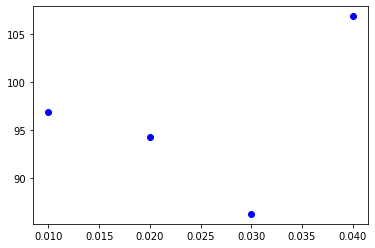

In [5]:
plt.plot(x_src, y_src, 'bo')

According to Taylor Series Approximation, we know that the function is defined as

![png](README_files/ts_fcn.png)

If we have multiple input variables x and output variables y, we can figure out a Taylor Series function from these domains (input variables x) and co-domains (output variables y) through matrix multiplication:


![png](README_files/y=Xc.png)


where

![png](README_files/vect_y.png),
![png](README_files/matrix_X.png),
![png](README_files/vect_c.png)

Since, the vector ![png](README_files/y.png) and matrix ![png](README_files/X.png) are known, so

![png](README_files/c=X-1y.png)


So, first we need to calculate the matrix ![png](README_files/X.png)

And here is the function the I have written to generate the matrix ![png](README_files/X.png) from x_src:

In [6]:
X = ts.gen_matrix_X(x_src)
X

array([[1.0e+00, 1.0e-02, 1.0e-04, 1.0e-06],
       [1.0e+00, 2.0e-02, 4.0e-04, 8.0e-06],
       [1.0e+00, 3.0e-02, 9.0e-04, 2.7e-05],
       [1.0e+00, 4.0e-02, 1.6e-03, 6.4e-05]])

To compute the vector constants:

In [7]:
consts = ts.gen_constants(X, y_src)
consts

array([ 6.03208469e+01,  6.73843987e+03, -3.64742574e+05,  5.63366226e+06])

Let's test the computed vector constants are working well, I have written the taylor function which accepts the input vector x and the vector constants as variables. Then, the output vector y is returned:

In [8]:
y_test = ts.fcn_taylors(x_src, consts)
y_test

array([ 96.86465053,  94.26191297,  86.31460782, 106.82470865])

We can see the value difference between the original vector y_src and the test result vector y_test. The differences are very small which can be ignored.

In [9]:
y_test - y_src

array([1.56319402e-13, 4.12114787e-13, 6.82121026e-13, 9.23705556e-13])

And now the interpolation can be tested:

In [10]:
x_interpolate = np.arange(start=0.01, stop=0.04, step=0.001)
x_interpolate

array([0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018,
       0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027,
       0.028, 0.029, 0.03 , 0.031, 0.032, 0.033, 0.034, 0.035, 0.036,
       0.037, 0.038, 0.039])

In [11]:
y_interpolate = ts.fcn_taylors(x_interpolate, consts)
y_interpolate

array([ 96.86465053,  97.80823856,  98.39416315,  98.65622628,
        98.62822992,  98.34397604,  97.83726662,  97.14190363,
        96.29168904,  95.32042483,  94.26191297,  93.14995543,
        92.01835419,  90.90091122,  89.8314285 ,  88.84370799,
        87.97155168,  87.24876153,  86.70913952,  86.38648763,
        86.31460782,  86.52730207,  87.05837235,  87.94162064,
        89.21084891,  90.89985914,  93.04245329,  95.67243335,
        98.82360128, 102.52975905])

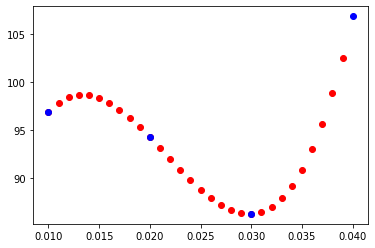

In [12]:
plt.plot(x_interpolate, y_interpolate, 'ro')
plt.plot(x_src, y_src, 'bo')

As we can see that the interpolation and the taylor function from random scattering values are successfully computed.

## Contributing

I'm writing this to test out how sphinx documentation and unittest works. The most important is to have fun. ^^

If there is some other algorithms that seems interesting, Maybe I will do some updates.

If you want to contribute too, you can fork it, but I'm still figuring it how the github works. ^^

## License

[MIT](./LICENSE)

## Reference

- Abramowitz, Milton; Stegun, Irene A. (1970), Handbook of Mathematical Functions with Formulas, Graphs, and Mathematical Tables, New York: Dover Publications, Ninth printing
- Thomas, George B., Jr.; Finney, Ross L. (1996), Calculus and Analytic Geometry (9th ed.), Addison Wesley, ISBN 0-201-53174-7
- Greenberg, Michael (1998), Advanced Engineering Mathematics (2nd ed.), Prentice Hall, ISBN 0-13-321431-1
- 3Blue1Brown (2017), Taylor series | Essence of calculus, chapter 11, https://www.youtube.com/watch?v=3d6DsjIBzJ4&t=15s
